In [1]:
import cv2
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

Versão da OpenCV:  3.4.0



## Imagem original

In [2]:
imagem = cv2.imread('falcon.jpg')

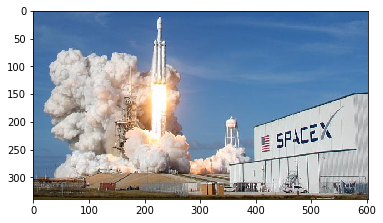

In [3]:
imshow(np.asarray(imagem[:, :, ::-1])) # altera a ultima dimensão para trocar azul por vermelho -> BRG to RGB

## Crop | Recorte

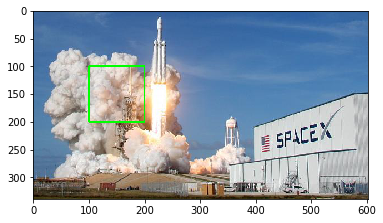

In [10]:
imagem = cv2.imread('falcon.jpg')
cv2.rectangle(imagem, (100, 100), (200, 200), (0,255,0), 2)
imshow(np.asarray(imagem[:, :, ::-1]))

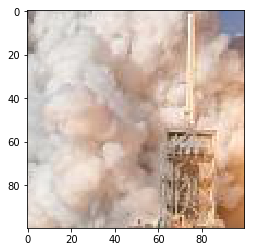

In [11]:
imagem = cv2.imread('falcon.jpg')
recorte = imagem[100:200, 100:200]
imshow(np.asarray(recorte[:, :, ::-1]))

## Resize | Redimensionamento

Tamanho original: 603 x 339 pixels
Tamanho novo: 200 x 112 pixels


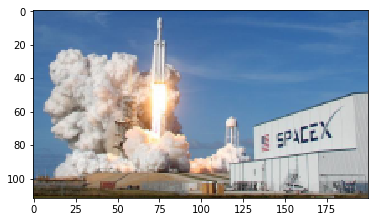

In [23]:
img = cv2.imread('falcon.jpg')
largura = img.shape[1] # captura o número de colunas 
altura = img.shape[0] # captura o número de linha

# Cálculo da proporção para evitar distorção na imagem
proporcao = float(altura/largura) # calcula a proporção
largura_nova = 200 #em pixels 
altura_nova = int(largura_nova*proporcao) # baseada na proporção
tamanho_novo = (largura_nova, altura_nova)

#redim = cv2.resize(img, (300,50), interpolation = cv2.INTER_AREA) 
redim = cv2.resize(img, tamanho_novo, interpolation = cv2.INTER_AREA) 

print('Tamanho original:',largura, 'x', altura, 'pixels')
print('Tamanho novo:',largura_nova, 'x', altura_nova, 'pixels')
imshow(np.asarray(redim[:, :, ::-1]))

## Flip | Espelhamento

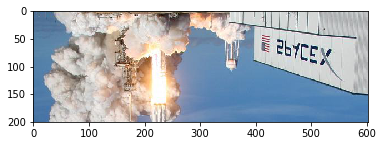

In [36]:
img = cv2.imread('falcon.jpg')
flip_horizontal = img[100:300,:] #comando equivalente abaixo
flip_horizontal = flip_horizontal[::-1,:] #comando equivalente abaixo
#flip_horizontal = cv2.flip(img, 1)
imshow(np.asarray(flip_horizontal[:, :, ::-1]))

## Rotation | Rotação

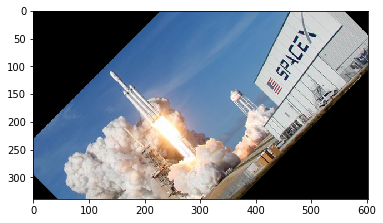

In [51]:
img = cv2.imread('falcon.jpg')

(alt, lar) = img.shape[:2] #captura altura e largura
centro = (lar // 2, alt // 2) #acha o centro
M = cv2.getRotationMatrix2D(centro, 45, 1.0) #30 graus
img_rotacionada = cv2.warpAffine(img, M, (lar, alt))

imshow(np.asarray(img_rotacionada[:, :, ::-1]))

## Masks | Máscaras

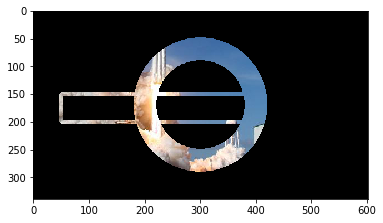

In [68]:
img = cv2.imread('falcon.jpg')

mascara = np.zeros(img.shape[:2], dtype = "uint8")
(cX, cY) = (img.shape[1] // 2, img.shape[0] // 2)
# Cria círculo na máscara
cv2.circle(mascara, (cX, cY), 100, 255, 40)
# Cria retângulo na máscara
cv2.rectangle(mascara, (50, 150), (400,200), 255, 5)
img_com_mascara = cv2.bitwise_and(img, img, mask = mascara)

imshow(np.asarray(img_com_mascara[:, :, ::-1]))